# Time Complexit of Algorithms

Being a good programmer is a big part of what makes a good data engineer. Even though programming is not strictly related to working with data, a study on LinkedIn job postings showed that about 50% of job postings for data engineering positions explicitly mention that they are looking for candidates that are good programmers. Moreover, most job interview processes have a generic coding interview and there, again, it is important to be a good programmer and problem solver.

In this course, you will learn how to analyze how good an algorithm is in terms of speed and memory. Simply put, an algorithm is a program or function that solves some specific problem. For example, a sorting algorithm is an algorithm that, given a list of values, outputs that same list of values but rearranges them in increasing order. There are numerous ways to write a Python function that sorts data. After completing this course, you will be able to compare different solutions of the same problem, for instance, sorting, and select the best in each given context.

Moore's law predicts that every two years, the speed of computers doubles. However, despite this, if our algorithms are poorly designed, these algorithms take longer to execute over time. The reason for this phenomena is that the speed of computers is not the only thing that is increasing over time: data is also growing, and it seems that it is growing at the same rate as the speed of computers!

Since both speed and data are growing at the same rate, shouldn't the computation time remain the same? After all, we double the amount of data that we want to process every two years, but we do it on a computer that is twice as fast. Well, that depends on the algorithm.

For some algorithms, the execution time is proportional to the amount of data that it processes. This means that for such algorithms, the execution time will remain somewhat the same over time. However, not all algorithms exhibit this property. The goal of this course, is to learn how to analyze the way the execution time of an algorithm changes with the data given to it.

Let's start by writing an algorithm that, given a list of numbers, outputs the maximum value of that list. After all, before we can start analyzing algorithms, we need to have some algorithm to analyze.

In [1]:
test_values = [4, 3, 5, 6, 2, 1]

def maximum(values):
    answer = None
    for value in values:
        if answer == None or answer < value:
            answer = value
    return answer
max_value = maximum(test_values)
max_value

6

Intuitively, the more data an algorithm needs to process, the more time it will take to run. What we are interested in is building a model that tells us by how much the time grows. We call these models the time complexity of an algorithm. By analyzing the time complexity of an algorithm, we want to be able to answer questions like:

If we double the data, do we double the execution time, do we quadruple it, or something else entirely?

Our starting point will be measuring execution times because it will help us build valuable intuition. Let's start by learning how to measure the execution time of a Python function.

Python offers a few different ways to do this. In this mission, we will use the time module. Calling the time.time() function we get total number of seconds that have passed from January 1, 1970, until now (depending on your OS, this date might change but that does not matter for what follows).

In [2]:
import time
print(time.time())

1585764483.6162567


As we said, the number that we get is the total number of seconds that have passed between January 1, 1970, and now.

Using the time.time() function, we can measure the time a Python function takes to execute by computing the difference between the time just after the function finishes executing and the time just before it started executing. If we call the time just before the execution start and the time just after end, then the execution time of the function will be end - start — as shown in blue on the following diagram:
<img src='images/time.png' />
Concretely, we can measure the execution time of a function f() in Python as follows:

In [6]:
import time                
start = time.time()        
max_value = maximum(test_values)
end = time.time()          
runtime = end - start
runtime

0.0

On the previous screen, we measured the execution time of the maximum() function on a list with 500 elements. Just a single measurement doesn't really help us understand how the maximum() function behaves in terms of execution time.

Let's make the input vary from length 1 to 500 and collect the execution time for each of them. The goal is to have an insight of how the execution evolves as the length of the list grows.

To do our experiment, we will need to have input lists with sizes 1 to 500 to execute the maximum() function on. One way to generate these inputs is to use the random module. This module provides, among other things, the random.randint() function that, given two integers a and b, outputs a random number between a and b (inclusive).

In [7]:
import random
print(random.randint(1, 10))
print(random.randint(1, 10))
print(random.randint(1, 10))
print(random.randint(1, 10))

6
5
6
10


Using list comprehensions, we can use the random.randint() function to generate a random list of length 500 with values, say, from -1,000 to 1,000, as follows:

In [11]:
values = [random.randint(-1000, 1000) for _ in range(500)]
values[0:5]

[140, -754, 436, 408, 233]

Notice that we used the _ notation in the above for loop. This is a notation that can be used when we do not use the iteration variable. It gives the exact same result that we would get using some variable name, but avoids having to find a name for something that we will not use.

Since we want to be able to generate inputs of lengths 1 to 500, it is convenient to define a function that takes as input a length and outputs a random list of the given length:
```python
def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]
```
We can now evaluate the execution time of the maximum() function on inputs ranging from length 1 to 500 by following these steps:

1. Using a for loop, make a variable length go over all values from 1 to 500
2. For each value of length, use the gen_input() function to get a random list of that length.
3. Use the time module to time the execution of the function on the generated input.
4. Collect all the values in a list

Let's measure the execution time of the maximum() function on random input lists from length 1 to 500.

In [15]:
import time
import random

def maximum(values):
    answer = None
    for value in values:
        if answer == None or answer < value:
            answer = value
    return answer

def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]

# add your code below
times = []
for length in range(1,501):
    values = gen_input(length)
    start = time.time()
    maximum(values)
    end = time.time()
    times.append(end-start)
print(len(times))
print(times)


500
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009982585906982422, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010247230529785156, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

On the previous screen, we evaluated the execution time of the maximum() function on input lists ranging from length 1 to length 500. The printed results are hard to read, so let's plot these times for visualizing how they are growing:
<img src='images/plot1.png' />
runtime tendency plot
We can see some spikes on the execution times at some points. These are due to the external factors such as CPU load, memory management, among others. However, despite the lack of accuracy of these measures, we can see a line forming underneath, which roughly describes how the execution time is increasing. This is shown in red in the the following plot:
<img src='images/plot2.png' />
runtime tendency plot
We can see that as the data increases, so does the execution time. This is not surprising since there is more data to process. However this tells us more. It gives us an insight on the rate at which it is increasing. The red line is a straight line which means that the time is growing somewhat proportionally with the data.

This is good news, because it means that the execution time grows as the same rate as the data. Doubling the amount of data will double the amount of time needed to process it.

The purpose of this mission is to learn how to look at an algorithm and derive a mathematical expression for the red line. As mentioned before, we call such an expression the time complexity of the algorithm:
<img src='images/real_vs_model.png' />
runtime tendency plot
With the time complexity model, we are able to plug in a list length and get an idea of the execution time of the algorithm for that input length without needing to actually run the code. In general, the time complexity can have several behaviors, it does not always grow as a straight line. We will learn several types of growth throughout this course. By the end of this course, you'll be able to analyze an algorithm and provide a time complexity model:
<img src='images/model.png' />
model

```python
def sum_values(values):
    total = 0            # c1, 1 time
    for value in values: # c2, N times
        total += value   # c3, N times
    return total         # c4, 1 time
```
Now we multiply the execution time of each line by the number of times it is executed, and add those together:
\begin{equation}
c_1 + c_2 \times N + c_3 \times N + c_4 = (c_2 + c_3) \times N + (c_1 + c_4)
\end{equation}
We can simplify a bit further by renaming c2 + c3 as another constant — let's say a — and c1 + c4 as b. By doing so, we obtain a cleaner expression for the execution time in terms of the size of the input (N):
\begin{equation}
a \times N + b
\end{equation}
The following figure shows the plot of aN + b for the different a, b value pairs:
<img src='images/ab.png' />

As you can see, regardless of the values of a and b, the function aN + b is a straight line. We call an algorithm whose time complexity is a straight line a linear time algorithm. These algorithms have the property that the execution times grows proportionally to the data:
<img src='images/linear_time.png' />

Let's measure the execution of sum_values() on inputs of length 1 to 500 to confirm our analysis. We expect our experiment to also result in a straight line, in the same way as it did for the maximum() function.

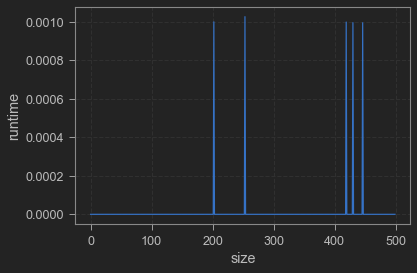

In [1]:
import time
import random
import matplotlib.pyplot as plt

def plot_times(times):
    plt.plot(times)
    plt.ylabel('runtime')
    plt.xlabel('size')
    plt.show()

def sum_values(values):
    total = 0            
    for value in values: 
        total += value   
    return total  

def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]

# add your code below
times = []
for length in range(1,501):
    values = gen_input(length)
    start = time.time()
    sum_values(values)
    end = time.time()
    times.append(end-start)
    
plot_times(times)

In our analysis on the previous screen, we needed to count how many times each line of code was executed. However, we cannot always do that. Consider for instance the maximum() function from before:

def maximum(values):
    answer = None
    for value in values:
        if answer == None or answer < value:
            answer = value
    return answer
How many times is the line answer = value executed? Well, that depends on the values list. The first time, it is always executed because answer is initially set to None. After that, it depends on the order of the elements in values.

For example, if values = [1, 2, 3, 4, 5] then, at every subsequent iteration, answer < value will be true, so the line will be executed one time for each value. On the other hand, if values = [5, 4, 3, 2, 1] then, the first time answer will be set to 5 and then the line will never be executed again.

We say that the first is a worst case execution analysis and the latter a best case execution analysis. When building a model for the execution time of an algorithm, we often focus on the worst case. There a few reasons for doing so:

We usually want to process data from a lot of different sources and, consequently, it turns out that the worst case actually occurs quite often.
It provides an upper bound. By focusing on the worst case when building the execution time model, we can guarantee that the executions times will always behave at most as badly as the models predicts. Imagine that your are selling an algorithm that 1% of the time takes one second and 99% takes over a one year. If you advertise it as taking one second (best case), your customers will not be very pleased.
In practice, this means that when building the model, the number of executions that we set for each line of code is the maximum number of times that it can possibly be executed.

With this in mind, let's build a model for the maximum() function and see whether it matches our experimental prediction.
```python
def maximum(values):
    answer = None                            # c1, 1 time,  c1
    for value in values:                     # c2, N times, c2*N
        if answer == None or answer < value: # c3, N times, c3*N
            answer = value                   # c4, N times, c4*N
    return answer                            # c5, 1 time,  c5
```
\begin{align}
\color{orange}c_\color{orange}1 + \color{red}c_\color{red}2 \times N + \color{red}c_\color{red}3 \times N + \color{red}c_\color{red}4 \times N + \color{orange}c_\color{orange}5 & = \
(\color{red}c_\color{red}2 + \color{red}c_\color{red}3 + \color{red}c_\color{red}4) \times N + (\color{orange}c_\color{orange}1 + \color{orange}c_\color{orange}5)
\end{align}

leaning up the constants by renaming c2 + c3 + c4 as a and c1 + c5 as b, we again obtain a linear model aN + b , as expected. This confirms our previous experimental results on the maximum() function.


In [1]:
def count_zeros(values):
    count = 0            # c1
    for value in values: # c2
        if value == 0:   # c3
            count += 1   # c4
    return count         # c5

model1 = '(c1 + c2) * N + (c3 + c4 + c5)'
model2 = '(c2 + c3) * N + (c1 + c4 + c5)'
model3 = '(c2 + c3 + c4) * N + (c1 + c5)'
correct = model3

So far, all the concrete functions that we analyzed had an execution time model that was linear, that is, of the form aN + b. Let's see an example where this is not the case. Consider the following zero_sum() function that counts the number of pairs of indexes whose values add up to 0.

For example, if values = [1, 3, 2, -3] there there are two pairs (1, 3) and (3, 1) because
```python
def zero_sum(values):
    N = len(values)                          
    count = 0                               
    for i in range(N):                     
        for j in range(N):                    
            if values[i] + values[j] == 0: 
                count += 1                    
    return count
```
We will proceed in the same way as we've been doing so far to build the execution time model.

Step 1: Assign an unknown constant to each line of code.
```python
def maximum(values):
    answer = None                            # c1, 1 time,  c1
    for value in values:                     # c2, N times, c2*N
        if answer == None or answer < value: # c3, N times, c3*N
            answer = value                   # c4, N times, c4*N
    return answer                            # c5, 1 time,  c5
def zero_sum(values):
    N = len(values)                        # c1                     
    count = 0                              # c2
    for i in range(N):                     # c3
        for j in range(N):                 # c4
            if values[i] + values[j] == 0: # c5
                count += 1                 # c6
    return count                           # c7
```
Step 2: Count how many times each line is executed. Let N denote the number of elements in the values list. Remember that we now consider worst cases. In this case we'll assume that the if condition is always true.

, N
```python
def zero_sum(values):
    N = len(values)                        # c1, 1 time                     
    count = 0                              # c2, 1 time
    for i in range(N):                     # c3, N times
        for j in range(N):                 # c4, N * N times
            if values[i] + values[j] == 0: # c5, N * N times
                count += 1                 # c6, N * N times
    return count                           # c7, 1 time
```
Before we take the next step, let's make sure we understand why the for loop on j and inner lines are executed N2 times. By itself, the for loop on j is executed N times since it loops over N values. However, it is wrapped inside the for loop on i, which is also executed N times. Therefore, the total number of executions of the line containing the for loop on j is N × N = N2.

A general rule of thumb is that a for loop inside another will be executed N2 times, a for loop inside two others will be executed N3 times, and so on.

Step 3: Multiply the constant execution time of each line by the number of times the line is executed.
```python
def zero_sum(values):
    N = len(values)                        # c1, 1 time,      c1                     
    count = 0                              # c2, 1 time,      c2
    for i in range(N):                     # c3, N times,     c3 * N
        for j in range(N):                 # c4, N * N times, c4 * N^2
            if values[i] + values[j] == 0: # c5, N * N times, c5 * N^2
                count += 1                 # c6, N * N times, c6 * N^2
    return count                           # c7, 1 time,      c7
```
Step 4: Add all values together and group terms together.
\begin{equation}
\color{orange}c_\color{orange}1 + \color{orange}c_\color{orange}2 + \color{red}c_\color{red}3 \times N + \color{blue}c_\color{blue}4 \times N^2 + \color{blue}c_\color{blue}5 \times N^2 + \color{blue}c_\color{blue}6 \times N^2 + \color{orange}c_\color{orange}7 =
\end{equation}
\begin{equation}
(\color{blue}c_\color{blue}4 + \color{blue}c_\color{blue}5 + \color{blue}c_\color{blue}6) \times N^2 + \color{red}c_\color{red}3 \times N + (\color{orange}c_\color{orange}1 + \color{orange}c_\color{orange}2 + \color{orange}c_\color{orange}7)
\end{equation}
Let's simplify this by denoting c4 + c5 + c6 as a, c3 as b and c1 + c2 + c7 as c. Doing so, we obtain the following execution time model:
\begin{equation}
a \times N^2 + b \times N + c
\end{equation}
<img src='images/quadratic_time.png' />
As the code becomes more complex, the analysis can become quite messy. In the next screen we'll simplify things further so that it becomes simpler to derive an execution time model.

Before that, let's practice identifying the execution time model of a more complex algorithm.